# Aproksymacja liniowa

***Zadanie 1.***

Zdefiniuj funkcję liniową z dowolnymi paramterami $a,b$. Przeprowadź symulację zaszumionego próbkowania jej wartości z przedziału [0,50]. Wykreśl funkcję wraz z jej zaszumionymi próbkami, a następnie dokonaj aproskymacji swojej funkcji za pomocą:
* funkcji liniowej,
* funkcji kwadratowej,
* wielomianu trzeciego stopnia.

Zastosuj metodę/metody minimalizujące najmniejszych kwadratów (normę średniokwadratową np. funkcję *curve_fit* z [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

Porównaj otrzymane wyniki z metodami interpolacji poznanymi na poprzednich zajęciach. W tym celu przeprowadź interpolację wygenerowanych danych za pomocą wielomianu interpolacyjnego Lagrange'a oraz za pomocą funkcji sklejanych.

*Wskazówka*: Najpierw wygerneruj tablicę 100 wartości $(x_i, f(x_i))$ dla $x_i \in [0,50]$. Następnie za pomocą np. funkcji *np.random.normal* wygeneruj 100-elementową tablicę szumu losowego i dodaj ją do wygenerowanych **wartości** funkcji (tj. do $f(x_i)$).

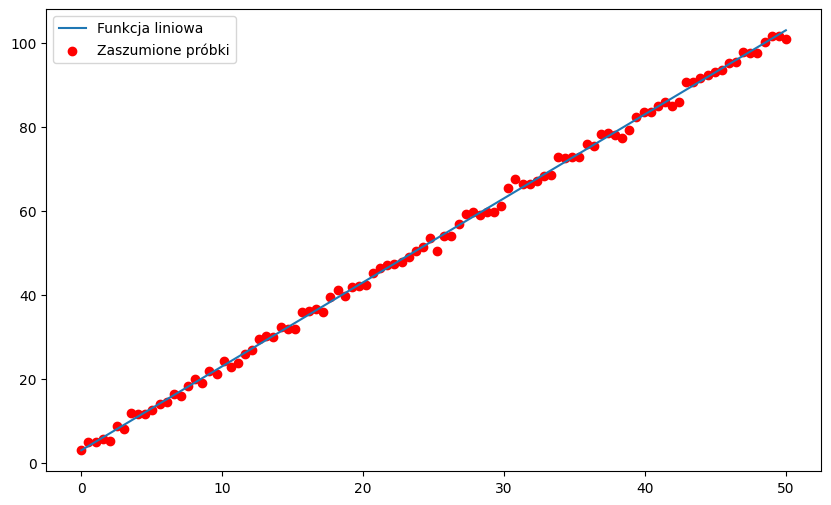

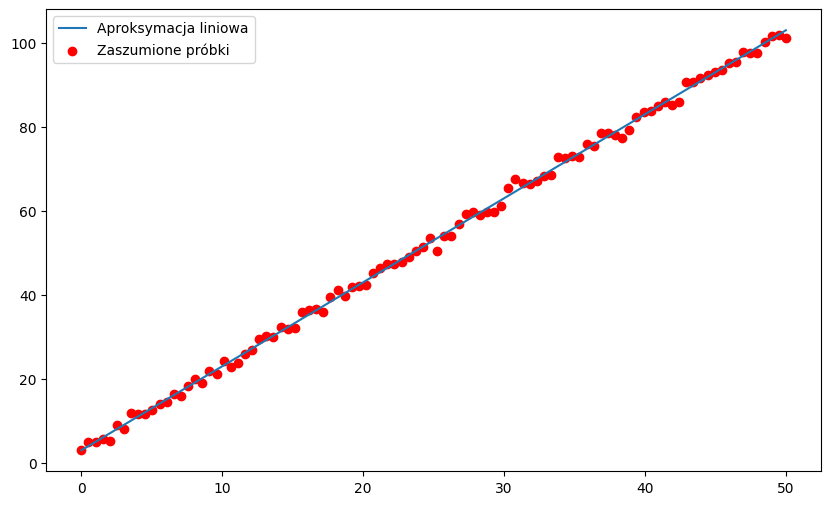

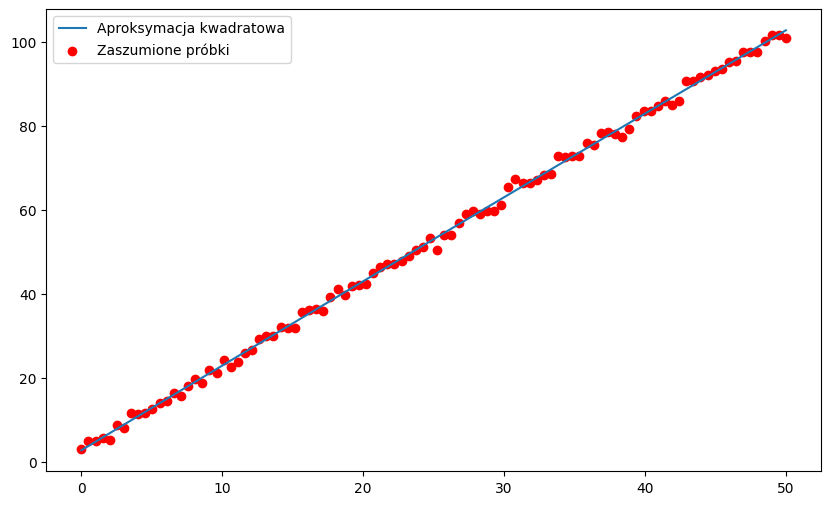

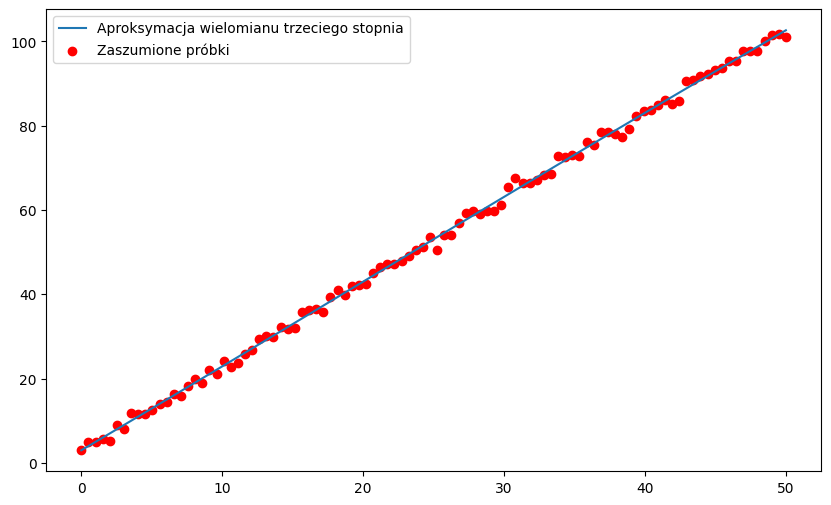

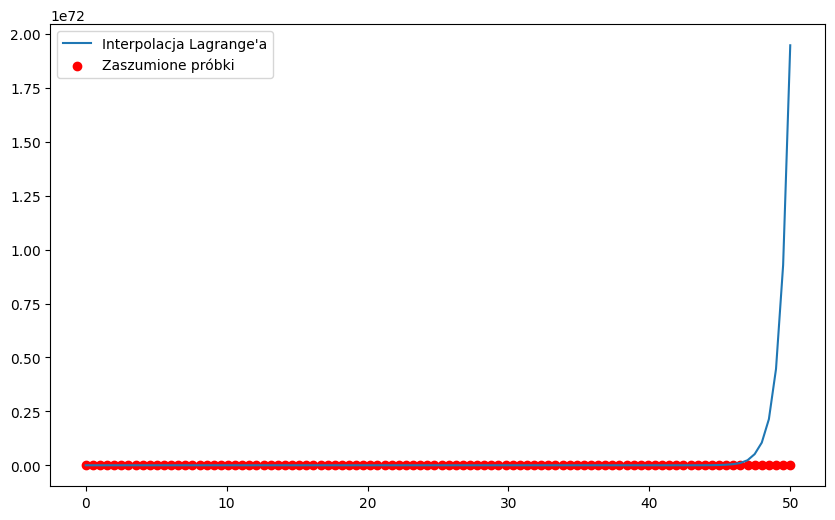

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import lagrange

# Definiowanie funkcji liniowej
def linear_function(x, a, b):
    return a * x + b

# Generowanie danych
x = np.linspace(0, 50, 100)
y = linear_function(x, 2, 3) # Przykładowe parametry a=2, b=3
noise = np.random.normal(0, 1, 100)
y_noisy = y + noise

# Wykreślanie funkcji i jej zaszumionych próbek
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Funkcja liniowa')
plt.scatter(x, y_noisy, color='red', label='Zaszumione próbki')
plt.legend()
plt.show()

# Aproksymacja za pomocą funkcji liniowej
popt, pcov = curve_fit(linear_function, x, y_noisy)
a_fit, b_fit = popt
y_fit = linear_function(x, a_fit, b_fit)

plt.figure(figsize=(10, 6))
plt.plot(x, y_fit, label='Aproksymacja liniowa')
plt.scatter(x, y_noisy, color='red', label='Zaszumione próbki')
plt.legend()
plt.show()

# Aproksymacja za pomocą funkcji kwadratowej
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(quadratic_function, x, y_noisy)
a_fit, b_fit, c_fit = popt
y_fit_quad = quadratic_function(x, a_fit, b_fit, c_fit)

plt.figure(figsize=(10, 6))
plt.plot(x, y_fit_quad, label='Aproksymacja kwadratowa')
plt.scatter(x, y_noisy, color='red', label='Zaszumione próbki')
plt.legend()
plt.show()

# Aproksymacja za pomocą wielomianu trzeciego stopnia
def cubic_function(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt, pcov = curve_fit(cubic_function, x, y_noisy)
a_fit, b_fit, c_fit, d_fit = popt
y_fit_cubic = cubic_function(x, a_fit, b_fit, c_fit, d_fit)

plt.figure(figsize=(10, 6))
plt.plot(x, y_fit_cubic, label='Aproksymacja wielomianu trzeciego stopnia')
plt.scatter(x, y_noisy, color='red', label='Zaszumione próbki')
plt.legend()
plt.show()

# Interpolacja za pomocą wielomianu interpolacyjnego Lagrange'a
poly_lagrange = lagrange(x, y_noisy)
y_fit_lagrange = poly_lagrange(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_fit_lagrange, label='Interpolacja Lagrange\'a')
plt.scatter(x, y_noisy, color='red', label='Zaszumione próbki')
plt.legend()
plt.show()


***Zadanie 2.***


Wykorzystaj metody aproksymacji do rozwiązania zadania z kierowcą z poprzednich ćwiczeń.


Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

In [10]:
import numpy as np
from scipy.interpolate import interp1d

# Dane z tabeli
czas = np.array([0.0, 1.0, 2.0, 3.0])
polozenie = np.array([0.0, 42.7, 73.2, 92.5])

# Tworzenie funkcji interpolującej
interpolacja = interp1d(czas, polozenie, kind='linear')

# Szukanie czasu, w którym położenie wynosiło 79.6 m
# Ponieważ funkcja interpolująca działa tylko w zakresie danych, użyjemy funkcji solve z scipy, aby znaleźć odpowiedni czas
from scipy.optimize import fsolve

czas_radar = fsolve(lambda t: interpolacja(t) - 79.6, 2.0)[0]  # Zacznij od 2.0, ponieważ 79.6 jest bliżej 73.2 niż 0.0

# Obliczenie prędkości w punkcie minęcia radaru
# Prędkość to pochodna położenia po czasie, więc użyjemy różnic skończonych z danych tabeli
v = np.diff(polozenie) / np.diff(czas)  # prędkości między kolejnymi punktami

# Interpolacja prędkości
interpolacja_v = interp1d(czas[:-1] + np.diff(czas)/2, v, kind='linear')  # interpolujemy w punktach środkowych
predkosc_radar = interpolacja_v(czas_radar)

print(f"Czas, w którym kierowca minął fotoradar: {czas_radar:.2f} s")
print(f"Prędkość kierowcy w momencie mijania fotoradaru: {predkosc_radar:.2f} m/s")

Czas, w którym kierowca minął fotoradar: 2.33 s
Prędkość kierowcy w momencie mijania fotoradaru: 21.19 m/s


***Zadanie 3.***


Spróbuj przeprowadzić regresję liniową (aproksymację funkcją liniową) na rzeczywistych danych (np. z repozytorium [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)). Wykorzystaj stworzony model do predykcji. Dla ułatwienia możesz zastosować funkcję z biblioteki [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Wczytaj dane (przykład z biblioteki sklearn)
data = load_diabetes()
X = data.data
y = data.target

# Możemy również wczytać dane z pliku CSV, np. pandas.read_csv()

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utwórz model regresji liniowej
model = LinearRegression()

# Trenuj model na zbiorze treningowym
model.fit(X_train, y_train)

# Dokonaj predykcji na zbiorze testowym
y_pred = model.predict(X_test)

# Oceń wydajność modelu
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Przykładowa predykcja na nowych danych
new_data_point = np.array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14]).reshape(1, -1)
predicted_value = model.predict(new_data_point)
print("Predicted value for new data point:", predicted_value[0])

Mean Squared Error: 2900.19362849348
Predicted value for new data point: 326.01558606323147
